<a href="https://colab.research.google.com/github/SidouPrince/NeuralNetwork/blob/main/tutorial03b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 3b. Multilayer Perceptrons with Auto-differentiation!

- In this tutorial you will train (again) a multilayer perceptron

- But differently from what you did in `tutorial3a`, since this time, you will let the `PyTorch` library do most of the complicated work for you

- The goal of this notebook is to make you get familiar with `PyTorch` and the its main concepts, that we will use repeatedly along the course.

- We will be training a multilayer perceptron on the `CIFAR-10` dataset, a popular dataset of images that is used in Computer-Vision (CV) research

- You will need to use a lot the documentation of `PyTorch` and look at examples for this notebook.

In [1]:
!pip install pytorch_lightning

In [2]:
import torch, torchvision
import numpy as np
import torch.nn as nn
from torchvision import datasets
import torchvision.transforms as transforms
from matplotlib import pyplot as plt
from math import *
import pytorch_lightning as pl

## Load the dataset

- `PyTorch` provides popular computer vision datasets that can be easily downloaded
- The following code will download the `CIFAR-10` dataset for us  
- Since it is computationally expensive to load the entire dataset into memory, we will use `PyTorch`'s dataloaders  before feeding batches of images to the neural network

**QUESTION.** Fill in the next cell

In [3]:
#!pip install colorama

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = datasets.CIFAR10(root = "./data", train = True, download = True, transform = transform)
testset = datasets.CIFAR10(root = "./data", train = False, download = True, transform = transform)

batch_size = 128
# You should use as many cores you have on your laptop
num_workers = 2

# Fill in the options for both data loaders. Warning: the training dataloader should shuffle the data
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, num_workers=num_workers)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


## Visualize the Images of CIFAR-10

* Once everything is properly loaded you should be able to visualize some of the samples of the CIFAR-10

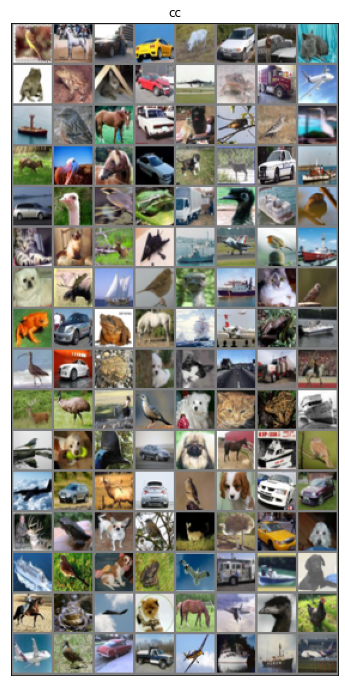

 bird horse   car   car  deer   car plane   cat  frog  frog   cat   car plane  frog truck plane  ship  bird horse   car   dog  bird  bird  bird  deer  bird horse   car   dog  deer   car  ship   car  bird  bird  frog truck  bird  ship  bird   cat   cat  deer plane  ship plane  bird  ship   dog  deer  ship  bird  bird  ship   cat  bird  frog   car  frog horse  ship plane  frog  ship  bird   car  frog   dog   cat truck truck horse  deer  bird horse  bird   dog   cat  frog  ship  bird   dog  bird   car   dog horse  ship  bird plane   car  deer   car  bird   dog   car   car  deer  frog   dog  bird  deer  bird   car   dog  ship  bird   dog  frog  bird truck  ship   dog horse  frog plane   dog horse plane  bird  bird plane  bird   car truck plane  ship  ship plane


In [5]:
def show_images(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    fig = plt.figure(figsize=(12,12))
    #plt.figure(figsize=(12, 12))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.xticks(())
    plt.yticks(())
    plt.title("cc")
    plt.show()
    
dataiter = iter(trainloader)
images, labels = dataiter.next()
show_images(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

## Creating a MLP model and train it

- We are now ready to define all the necessary hyperparameters that are required to construct a proper MLP
- Similarly to what we did in `tutorial03a` we need to explore the data carefully in order to know how to set the following parameters

### Hyperparameters

**QUESTION.** Fill the hyperparameters

In [6]:
input_dim =32*32 * 3
hidden_dim = 512
output_dim = 10
learning_rate = 1e-4
num_epochs = 5

### Computation Graph

- You are free to define any kind of architecture that you think is reasonable for the problem of classifying CIFAR-10 images
- By default, you can use a multi-layer perceptron
- The constructor of the neural network will represent the different components of the computation-graph, note that it is very similar to the way we have programmed our own neural network in `tutorial03a`.
- You will also have to define the forward pass yourself.

In [7]:
class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(Net, self).__init__()
        self.layers = nn.Sequential(
            
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )
        
    def forward(self, x):
        return self.layers(x)

### Create the Network

- You are now ready to create your neural network object
- You will also have to define an appropriate loss function to minimize and an optimization algorithm
- By default, you can use the cross-entropy loss and the RMS prop optimizer

In [8]:
model = Net(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

### Train the Network

- Once you have your neural network you just need to train it. 
- You will have to compute the output of the forward pass, compare it to your desired output and update the parameters of the network by backpropagation. 
- Fortunately this time, this only requires less than 5 lines of code in `PyTorch`

In [9]:
def train(num_epochs):
    for epoch in range(num_epochs):
        train_loss = 0.0

        print("starting epoch: {}".format(epoch+1))
        print("############")
        model.train()
        for image, label in trainloader:
          
          #forward
          image = image.view(-1, 32*32*3)
          optimizer.zero_grad()

          predictions = model(image)
          l = criterion(predictions, label)
          #backward
          l.backward()
          optimizer.step()
          train_loss += l.item()
        #calculer train_loss pour chaque epoch
        train_loss = train_loss / ceil(50000 / batch_size)
        print("Epoch: {} \tTraining Loss {:.6f}".format(
            epoch+1,
            train_loss
        ))

In [10]:
# for label, img in testloader:
#   i = 0
#   k = 2
#   print(label.size())
#   label = label.view(-1, 32*32*3)
#   print(label.size())
#   pred = model(label)
#   print(pred)
#   _, pr = torch.max(pred, 1)
#   print(pr)
#   print("les vrais labels")
#   print(img)
#   correct = np.squeeze(pr.eq(img))
#   print(correct)
#   k = k + correct[2].item()
#   print(k)
#   break

In [11]:
print(len(trainloader.sampler))

50000


In [12]:

train(num_epochs)

starting epoch: 1
############
Epoch: 1 	Training Loss 1.725031
starting epoch: 2
############
Epoch: 2 	Training Loss 1.493368
starting epoch: 3
############
Epoch: 3 	Training Loss 1.391253
starting epoch: 4
############
Epoch: 4 	Training Loss 1.316824
starting epoch: 5
############
Epoch: 5 	Training Loss 1.254840


- Of course, repeated calls to `train` will continue training from where it were
- Training a neural network is a highly iterative process.

## Evaluate the final performance of the Network

- Once you think your network is properly trained, you will test its performance on the testing-set of the CIFAR-10 dataset
- Compute the final accuracy of your model
- You should be able to reach a 50% accuracy with a simple multi-layer perceptron

In [13]:
def test():
  correct_prediction_for_each_class = list(0. for i in range(10))
  total_samples_for_each_class = list(0. for i in range(10))

  model.eval()
  for images, labels in testloader:
    images = images.view(-1, 32*32*3)
    predictions_proba = model(images)
    _, predictions_classes = torch.max(predictions_proba, 1)
    correct_predictions = np.squeeze(predictions_classes.eq(labels))

    for i in range(len(labels)):
      classe = labels.data[i]
      correct_prediction_for_each_class[classe] += correct_predictions[i].item()
      total_samples_for_each_class[classe] += 1
  #calculer l'accuracy pour chaque classe

  for i in range(10):
    print("Test Accuracy of {} \t {:.6f}".format(
          classes[i],
          100 * correct_prediction_for_each_class[i] / total_samples_for_each_class[i]
      ))
    

In [14]:
test()

Test Accuracy of plane 	 59.800000
Test Accuracy of car 	 61.500000
Test Accuracy of bird 	 38.500000
Test Accuracy of cat 	 33.600000
Test Accuracy of deer 	 25.500000
Test Accuracy of dog 	 49.700000
Test Accuracy of frog 	 66.600000
Test Accuracy of horse 	 62.900000
Test Accuracy of ship 	 69.500000
Test Accuracy of truck 	 56.900000


**Final remark.** Of course, this is far from being the state-of-the-art. Indeed, convolutional neural nets are the backbones for computer vision problems (we will do it in following labs), while we only used here a feed-forward network.

## Redo it using `pytorch-lightning`

There is some boilerplates in pure `PyTorch` code. The `pytorch-lighting` library is a new library allowing to simplify a lot the use of `PyTorch` together with very nice options for faster training and development.

**QUESTION**. Recode your neural network and its training using `pytorch-lightning`.

In [69]:
class NetL(pl.LightningModule):

  def __init__(self):
    super(NetL, self).__init__()
    self.layers = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )
    self.ce = nn.CrossEntropyLoss()

  def forward(self, x):
      x = x.view(x.size(0), -1)
      return self.layers(x)
    
  def training_step(self, batch, batch_idx):
      x, y = batch
      y_hat = self.forward(x)
      loss = self.ce(y_hat, y)
      return loss
    
  def train_dataloader(self):
      return torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=num_workers) 

  def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-4)
        return optimizer  


  def test_step(self, batch, batch_idx):
    x, y = batch
    y_hat = self.forward(x)
    loss = self.ce(y_hat, y)
    return loss


  def test_epoch_end(self, outputs):
    loss_per_batch = []
    for i in outputs:
      loss_per_batch.append(i.item())
    array_loss = np.array(loss_per_batch)
    self.test_loss = np.mean(array_loss)


  def test_dataloader(self):
    return torch.utils.data.DataLoader(testset, batch_size=batch_size, num_workers=num_workers) 

In [70]:
model_lightning = NetL()

In [71]:
trainer = pl.Trainer(gpus=1, max_epochs=5)
trainer.fit(model_lightning)


GPU available: True, used: True
TPU available: None, using: 0 TPU cores

  | Name   | Type             | Params
--------------------------------------------
0 | layers | Sequential       | 1.8 M 
1 | ce     | CrossEntropyLoss | 0     
--------------------------------------------
1.8 M     Trainable params
0         Non-trainable params
1.8 M     Total params
7.365     Total estimated model params size (MB)


1

In [74]:
trainer.test()
print("test loss: ", model_lightning.test_loss)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------
test loss:  1.34195730806906


In [45]:
print(len(testloader.sampler)/128)

78.125
